In [185]:
# importing libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# loading cifar 10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [187]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [188]:
y_train = y_train.reshape(-1,)

In [189]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [190]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [191]:
y_train[1]

9

In [192]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [193]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

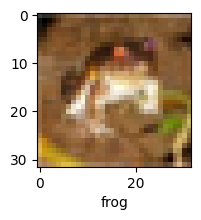

In [194]:
plot_sample(x_train, y_train, 0)

In [195]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [196]:
# normalization, (pixels = 255)

x_train, x_test = x_train/255, x_test/255

In [197]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [198]:
# training CNN model
cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])

C:\Users\Sheheryar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [200]:
cnn.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3447 - loss: 1.7819
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5758 - loss: 1.2005
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6488 - loss: 1.0127
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6888 - loss: 0.8949
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7151 - loss: 0.8165
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7419 - loss: 0.7463
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7628 - loss: 0.6805
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7797 - loss: 0.6339
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7918 - loss: 0.5910
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8036 - loss: 0.5549
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8143 - loss: 0.5245
Epoch 12/

In [201]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7002 - loss: 1.6262


[1.6326464414596558, 0.6980000138282776]

In [202]:
y_test = y_test.reshape(-1,)

In [203]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

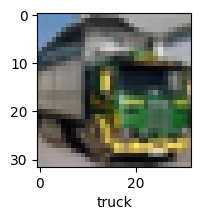

In [204]:
plot_sample(x_test, y_test, 14)

In [205]:
# testing cnn model
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [207]:
y_pred_class = [np.argmax(element) for element in y_pred]
y_pred_class[:5]

[3, 8, 9, 0, 6]

In [208]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [209]:
# accuracy of prediction
acc = accuracy_score(y_test, y_pred_class)

print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 69.80%


In [210]:
# Generate a classification report
report = classification_report(y_test, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.65      0.53      0.58      1000
           3       0.54      0.49      0.51      1000
           4       0.60      0.71      0.65      1000
           5       0.62      0.62      0.62      1000
           6       0.71      0.82      0.76      1000
           7       0.76      0.69      0.72      1000
           8       0.78      0.82      0.80      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

